In [113]:
import gpxpy
import gpxpy.gpx
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from collections import defaultdict

In [150]:
def parse_gpx(filepath):
    gpx = open(filepath, 'r')
    parsed_gpx = gpxpy.parse(gpx)
    return parsed_gpx

In [151]:
def format_data(gpx):
    data = defaultdict(list)
    for track in gpx.tracks: 
        for segment in track.segments:
            for point in segment.points: 
                for ext in point.extensions: 
                    data[ext.tag].append(float(ext.text))
    return data 

In [152]:
# util functions  
mps_to_mins_per_km = lambda mps: (1 / 60) / (mps/1000)
secs_to_mins = lambda secs: round(secs / 60, 3)

# Given a list of distance (in meters) covered each second, and an interval in meters, calculate the pace (mins/km) for each interval 
def get_pace_for_intervals(speeds, interval=1000):
    def get_pace_for_interval(cum_seconds, interval_length):
        minutes = secs_to_mins(cum_seconds)
        adjusted_pace = minutes  * (1000/interval_length)
        return round(adjusted_pace, 2) 

    paces = []
    intervals = []

    cum_dist, cum_secs = 0, 0
    for mps in speeds: 
        cum_dist += mps 
        cum_secs += 1

        if cum_dist >= interval: 
            adjusted_pace = get_pace_for_interval(cum_secs, interval)
            paces.append(adjusted_pace)
            intervals.append(len(intervals) + 1)
            cum_dist, cum_secs = 0, 0 
            
    if cum_dist > 0: 
        adjusted_pace = get_pace_for_interval(cum_secs, cum_dist)
        adjusted_interval = round(len(intervals) + cum_dist/interval, 2)

        paces.append(adjusted_pace)
        intervals.append(adjusted_interval)

    return pd.DataFrame.from_dict({
        'interval': intervals,
        'paces': paces
    })



In [167]:
def plot_paces(paces, interval_length):
    adjusted_distance = np.arange(len(paces)) * interval_length/1000
    plt.plot(adjusted_distance, paces)
    plt.xlabel('distance (km)')
    plt.ylabel('pace (mins/km)')
    plt.show()

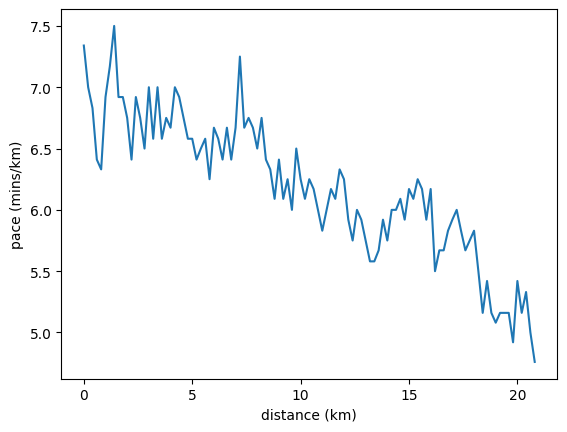

In [171]:
workout = parse_gpx('workout-routes/route_2023-10-28_9.52am.gpx')
data = format_data(workout)

interval = 200
df = get_pace_for_intervals(data['speed'], interval)
plot_paces(df['paces'], interval)


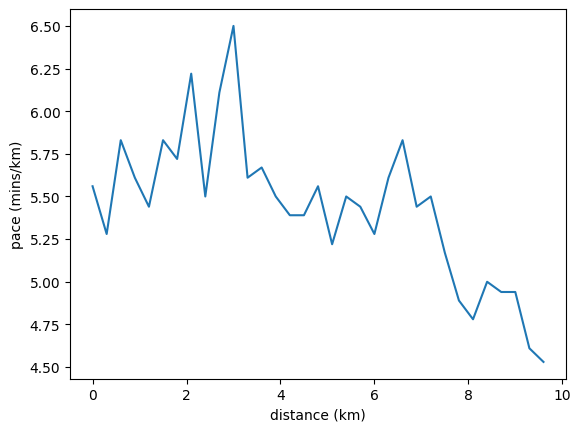

In [170]:
workout = parse_gpx('workout-routes/route_2023-11-12_8.57am.gpx')
data = format_data(workout)
df = get_pace_for_intervals(data['speed'], interval=300)
plot_paces(df['paces'], 300)